<font size = 1 color="gray">Introducción a la computación numérica y simbólica con Python</font>  

# Práctica 3. Curso 2024/2025

## EDOs no lineales y acopladas

### Elegir uno de los siguientes modelos y simular mediante Python su comportamiento


A. Sencillo. Hasta 5 puntos. Representar la evolución en el tiempo y en el plano de fase en función de diferentes parámetros de este sistema que equivale a un péndulo con elasticidad variable.
Oscilador de Duffing [https://en.wikipedia.org/wiki/Duffing_equation]

B. Intermedio. Hasta 8 puntos. Resolver el sistema de ODEs acopladas para dos sólidos unidos por resorte como se indica en el documento
[https://people.uncw.edu/hermanr/mat361/ODEBook/Systems.pdf]. Representar la evolución temporal de posiciones y velocidades y dicsutor casos límite.

2 puntos adicionales por añadir un video con animación de las soluciones


---

<font size="1" color="grey">
    (c) 2023-2024 Javier García Algarra. <a href='https://www.u-tad.com'>www.u-tad.com</a> <br>
Licensed under a Creative Commons Reconocimiento 4.0 Internacional License
</font> 

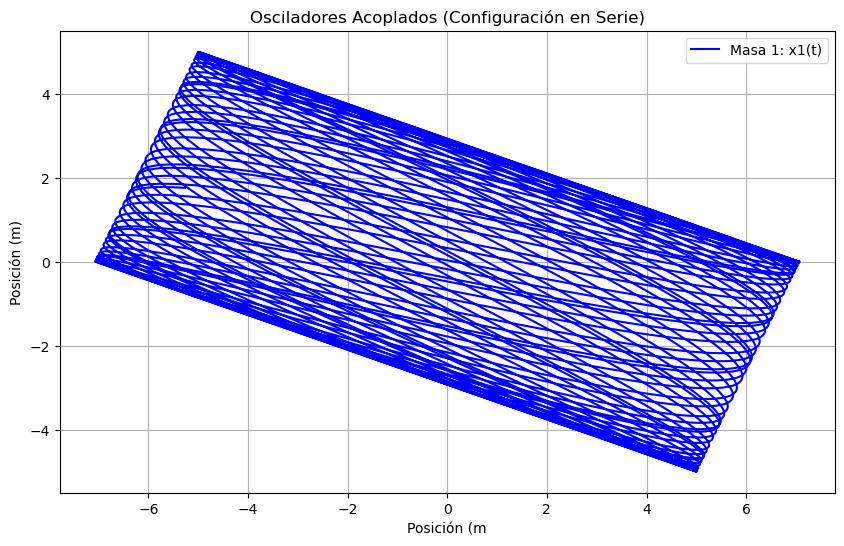

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Definición del tiempo
tini = 0
tfin = 200
npuntos = 10000
t = np.linspace(tini, tfin, npuntos)

# Constantes del sistema
k1 = 1  # Constante elástica del resorte 1
k2 = 0.5  # Constante elástica del resorte 2
m1 = 1  # Masa 1
m2 = 1  # Masa 2

# Condiciones iniciales: [x1_0, v1_0, x2_0, v2_0]
condiciones_iniciales = [5, 0, -5, 0]  # Posiciones y velocidades iniciales

def coupled_oscillators(valores, t, k1, k2, m1, m2):
    x1, v1, x2, v2 = valores
    # Ecuaciones diferenciales
    dx1dt = v1
    dv1dt = (-k1 * x1 + k2 * (x2 - x1)) / m1
    dx2dt = v2
    dv2dt = (-k2 * (x2 - x1)) / m2
    return [dx1dt, dv1dt, dx2dt, dv2dt]

# Resolver el sistema
solucion = odeint(coupled_oscillators, condiciones_iniciales, t, args=(k1, k2, m1, m2))

# Extraer las soluciones
x1 = solucion[:, 0]  # Posición de la masa 1
v1 = solucion[:, 1]  # Velocidad de la masa 1
x2 = solucion[:, 2]  # Posición de la masa 2
v2 = solucion[:, 3]  # Velocidad de la masa 2

# Graficar las soluciones
plt.figure(figsize=(10, 6))
plt.plot(x1, x2, label='Masa 1: x1(t)', color='blue')
#plt.plot(t, x2, label='Masa 2: x2(t)', color='red')
plt.xlabel('Posición (m')
plt.ylabel('Posición (m)')
plt.title('Osciladores Acoplados (Configuración en Serie)')
plt.legend()
plt.grid()
plt.show()

